1. Estudiar los diferentes espacios de color que tiene OpenCV, utilizando imágenes de su proyecto.
2. Implementar, como una función para OpenCV, las conversiones entre los espacios de color siguientes:
  RGB a LUX y su inversa.
  RGB a OHTA y su inversa.
evaluarlas en su proyecto o en aplicaciones a detección de rostros y de segmentación de productos, respectivamente.

Listo


(<matplotlib.axes._subplots.AxesSubplot at 0x11d7a7690>,
 <matplotlib.text.Text at 0x11f0ae110>)

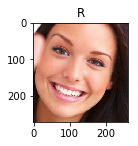

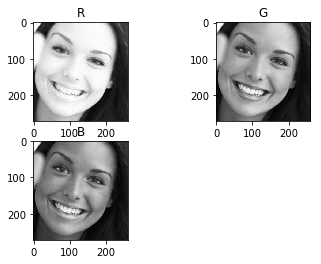

In [47]:
%matplotlib inline
import cv2
import time
from IPython.display import Image
import numpy as np
from matplotlib import pyplot as plt
from __future__ import division
#from scipy.fftpack import fft, fftfreq

img = cv2.imread('Fig/face.png',1)
print "Listo"
imgrgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(1)
plt.subplot(221), plt.imshow(imgrgb, cmap=plt.cm.gray), plt.title('R')

plt.figure(2)
plt.subplot(221), plt.imshow(imgrgb[:,:,0], cmap=plt.cm.gray), plt.title('R')
plt.subplot(222), plt.imshow(imgrgb[:,:,1], cmap=plt.cm.gray), plt.title('G')
plt.subplot(223), plt.imshow(imgrgb[:,:,2], cmap=plt.cm.gray), plt.title('B')

(<matplotlib.axes._subplots.AxesSubplot at 0x117bfa6d0>,
 <matplotlib.text.Text at 0x117c37550>)

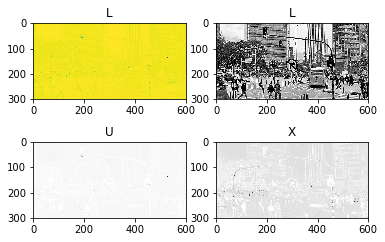

In [12]:
def RGBTLUX(img):
    red = img[:,:,0]
    green = img[:,:,1]
    blue = img[:,:,2]

    width, height = img.shape[:2]
    
    L = np.zeros((width,height),np.uint8)
    U = np.zeros((width,height),np.uint8)
    X = np.zeros((width,height),np.uint8)
    L = (((np.float32(red)+1)**0.3)*((np.float32(green)+1)**0.6)*((np.float32(blue)+1)**0.6))-1

    if((L>=np.float32(red)).all()):
        U = 128*((np.float32(red)+1)/(L+1))
    else:
        U = 256 - 128*((L+1)/(np.float32(red)+1))
    
    if((L>=np.float32(blue)).all()):
        X = 128*((np.float32(blue)+1)/(L+1))
    else:
        X= 256 - 128*((L+1)/(np.float32(blue)+1))
   
    return L ,U , X

L, U , X = RGBTLUX(imgrgb)
plt.figure(1)
plt.subplot(221), plt.imshow(L+U+X), plt.title('L')
plt.subplot(222), plt.imshow(L, cmap=plt.cm.gray), plt.title('L')
plt.subplot(223), plt.imshow(U, cmap=plt.cm.gray), plt.title('U')
plt.subplot(224), plt.imshow(X, cmap=plt.cm.gray), plt.title('X')

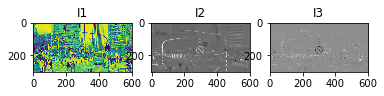

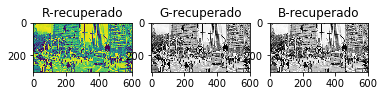

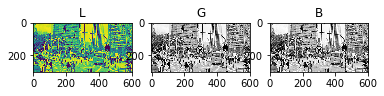

In [13]:
def RGBTOIII(img):
    red = img[:,:,0]
    green = img[:,:,1]
    blue = img[:,:,2]

    width, height = img.shape[:2]
    
    I1 = (1/3)*(np.float32(red)+np.float32(green)+np.float32(blue))
    I2 = (1/2)*(np.float32(red)-np.float32(blue))
    I3 = (1/4)*(2*np.float32(green)-np.float32(red)-np.float32(blue))
    return I1,I2,I3

def IIITORGB(I1,I2,I3, img):
    width, height = img.shape[:2]

    R = I1 + I2 -(2/3)* I3
    G = I1 + (4/3)* I3
    B = I1 - I2 -(2/3)*I3
    red = img[:,:,0]
    green = img[:,:,1]
    blue = img[:,:,1]
    return R,G,B

I1,I2,I3 = RGBTOIII(imgrgb)
R1,G1,B1 = IIITORGB(I1,I2,I3,imgrgb)

plt.figure(1)
plt.subplot(131), plt.imshow(I1), plt.title('I1')
plt.subplot(132), plt.imshow(I2,cmap=plt.cm.gray), plt.title('I2')
plt.subplot(133), plt.imshow(I3, cmap=plt.cm.gray), plt.title('I3')
plt.show()
plt.figure(2)
plt.subplot(131), plt.imshow(R1), plt.title('R-recuperado')
plt.subplot(132), plt.imshow(G1,cmap=plt.cm.gray), plt.title('G-recuperado')
plt.subplot(133), plt.imshow(B1, cmap=plt.cm.gray), plt.title('B-recuperado')
plt.show()
plt.figure(3)
plt.subplot(131), plt.imshow(imgrgb[:,:,0]), plt.title('L')
plt.subplot(132), plt.imshow(imgrgb[:,:,1],cmap=plt.cm.gray), plt.title('G')
plt.subplot(133), plt.imshow(imgrgb[:,:,2], cmap=plt.cm.gray), plt.title('B')
plt.show()

(<matplotlib.axes._subplots.AxesSubplot at 0x11ef758d0>,
 <matplotlib.text.Text at 0x115659890>)

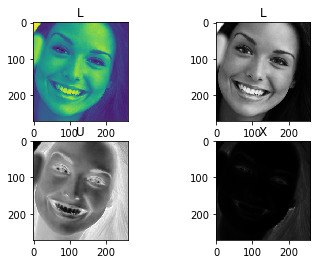

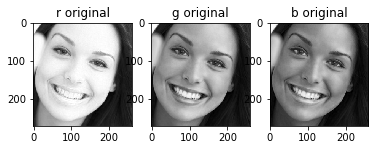

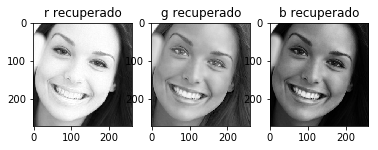

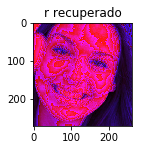

In [48]:
def LUXRGB(L,U,X):
    
    if (not U.all()<128):
        R=((U*(L+1))/128)-1
    else:
        R=((128)*(L+1)/(256-U))-1

    if (X.all() <128):
        B=((X*(L+1))/128)-1
    else:
        B=((128)*(L+1)/(256-X))-1

    G=((L+1) /((R+1)**(0.3) * (B+1)**(0.6)))**(5/3) -1
    return R,G,B

L, U , X = RGBTLUX(imgrgb)
nuevoR,nuevoG,nuevoB=LUXRGB(L,U,X)
red = imgrgb[:,:,0]
green = imgrgb[:,:,1]
blue = imgrgb[:,:,2]
plt.figure(1)
plt.subplot(221), plt.imshow(L+U+X), plt.title('L')
plt.subplot(222), plt.imshow(L, cmap=plt.cm.gray), plt.title('L')
plt.subplot(223), plt.imshow(U, cmap=plt.cm.gray), plt.title('U')
plt.subplot(224), plt.imshow(X, cmap=plt.cm.gray), plt.title('X')
plt.figure(2)
plt.subplot(131), plt.imshow(red, cmap=plt.cm.gray), plt.title('r original')
plt.subplot(132), plt.imshow(green, cmap=plt.cm.gray), plt.title('g original')
plt.subplot(133), plt.imshow(blue, cmap=plt.cm.gray), plt.title('b original')

plt.figure(3)
plt.subplot(131), plt.imshow(nuevoR, cmap=plt.cm.gray), plt.title('r recuperado')
plt.subplot(132), plt.imshow(nuevoG, cmap=plt.cm.gray), plt.title('g recuperado')
plt.subplot(133), plt.imshow(nuevoB, cmap=plt.cm.gray), plt.title('b recuperado')

imgrgb[:,:,0] = nuevoR
imgrgb[:,:,1] = nuevoG
imgrgb[:,:,2] = nuevoB
plt.figure(4)
plt.subplot(131), plt.imshow(imgrgb), plt.title('r recuperado')


        